In [1]:
from deck import BlackjackShoe
from dealer import Dealer
from round import BlackjackRound
from hand import Hand
from game import Game, BLACKJACKSIXTOFIVEPAYOUT, BLACKJACKTHREETOTWOPAYOUT
from strategies.strategy import StrategyTable
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
rounds = []
games = []
num_players = 1
num_games = 1
bet_size = 10
num_rounds = 1000000
win_count_matrix = np.zeros((10, 35))
profit_count_matrix = np.zeros((10, 35))
total_count_matrix = np.zeros((10, 35))
for _ in range(num_games):
    game = Game(num_decks=8, num_players=num_players, strategy=StrategyTable["MULTIDECK"], hit_on_soft_17=True, blackjack_payout=BLACKJACKTHREETOTWOPAYOUT, min_bet=bet_size, denominations=100, player_bankroll=0, resplit_till=4)
    for player in game.players:
        player.ace_five_counting = False
        player.high_low_counting = False
    round_data = game.play(num_rounds, print_cards=False, print_round_results=False)
    rounds.extend(round_data)
    games.append(game.house_bankroll)
    win_count_matrix += game.win_count_matrix
    profit_count_matrix += game.profit_count_matrix
    total_count_matrix += game.total_count_matrix


win_percentage_matrix = np.divide(win_count_matrix, total_count_matrix, out=np.zeros_like(win_count_matrix), where=total_count_matrix != 0)
sum = 0
wins = 0
losses = 0
pushes = 0
for g in rounds:
    if g > 0:
        wins += 1
    elif g < 0:
        losses += 1
    else:
        pushes += 1
    sum += g
print(sum)

print(sum / num_players / num_games / num_rounds)
print(f"Wins: {wins / num_rounds}, Losses: {losses / num_rounds}, Pushes: {pushes / num_rounds}")
print()

=== Results After 1000000 Games ===
Player 0: $-14810.0
House Bankroll: $14810.0
Cards Left: 382
Decks Left: 7.5
14810.0
0.01481
Wins: 0.476252, Losses: 0.434659, Pushes: 0.089089



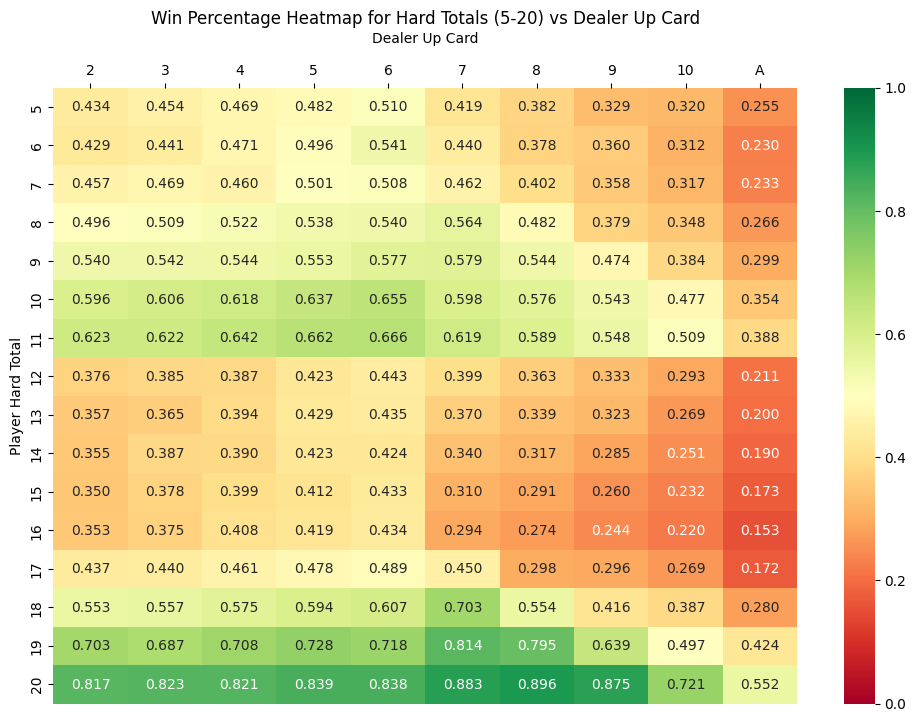

In [3]:
win_percentage_matrix_hard = win_percentage_matrix[:, :16]

win_percentage_matrix_hard = win_percentage_matrix_hard.T

# Define labels:
hard_totals = list(range(5, 21))  # Hard totals from 5 to 20 (16 values)
dealer_labels = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "A"]

plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    win_percentage_matrix_hard,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",  # Red for lower win rates, green for higher win rates
    xticklabels=dealer_labels,  # Dealer up cards at the top
    yticklabels=hard_totals,    # Hard totals on the left
    vmin=0,
    vmax=1
)
ax.xaxis.set_label_position('top')  # Moves the x-axis label to the top
ax.set_xlabel("Dealer Up Card", labelpad=15)  # Adjust labelpad as needed
ax.xaxis.tick_top()  # Moves the tick labels to the top

ax.set_title("Win Percentage Heatmap for Hard Totals (5-20) vs Dealer Up Card")
ax.set_xlabel("Dealer Up Card")
ax.set_ylabel("Player Hard Total")
plt.show()

[[0.51028999 0.55422794 0.56371191 0.56561922 0.58093995 0.54339797
  0.54943503 0.47910593 0.41852956 0.34427083]
 [0.53809972 0.53252788 0.53680982 0.54944547 0.58086124 0.53483043
  0.51043738 0.47111554 0.42177039 0.30952381]
 [0.49575872 0.50344488 0.53876853 0.53669725 0.53977845 0.5199005
  0.48759921 0.44287159 0.39664083 0.29559426]
 [0.49229188 0.50256148 0.52847153 0.54507338 0.58284314 0.50195503
  0.47819473 0.42222222 0.36315518 0.25523013]
 [0.50424528 0.50214041 0.54059217 0.54429783 0.5625     0.54803719
  0.48526316 0.43509351 0.37850932 0.26718404]
 [0.54496579 0.53620352 0.58474576 0.58789625 0.59005146 0.72121487
  0.54154448 0.45238095 0.39026527 0.30527383]
 [0.69882468 0.67114695 0.71169916 0.6989936  0.6094306  0.83240223
  0.80350195 0.63730804 0.49710715 0.45837616]
 [0.82916667 0.82195122 0.82352941 0.82674632 0.83592233 0.87866928
  0.89490446 0.87402344 0.72734045 0.55662393]
 [1.         1.         1.         1.         1.         1.
  1.         1.      

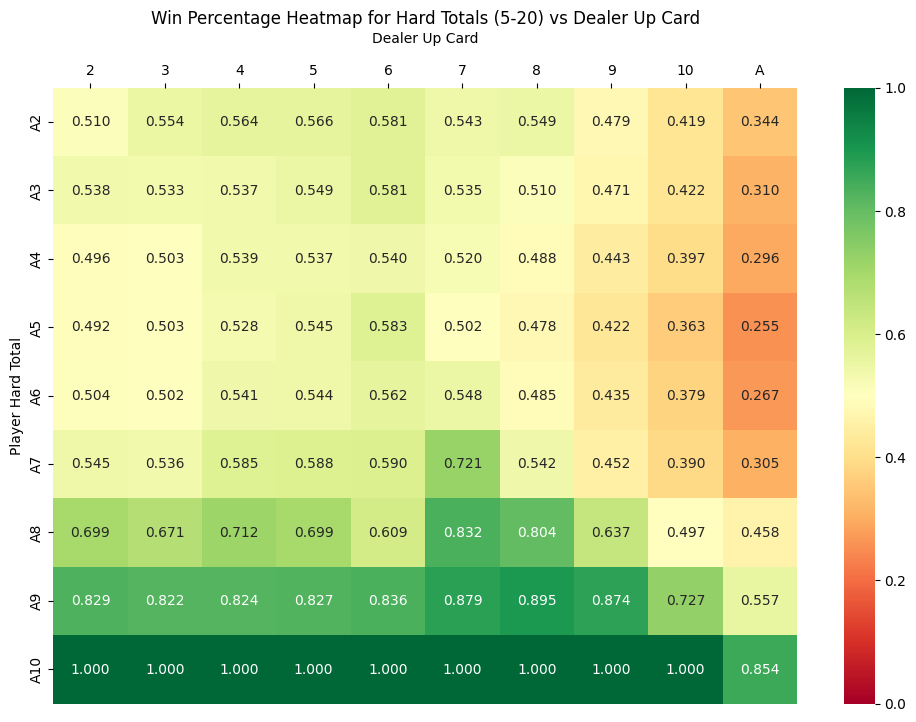

In [10]:
win_percentage_matrix_hard = win_percentage_matrix[:, 16:25]

win_percentage_matrix_hard = win_percentage_matrix_hard.T

print(win_percentage_matrix_hard)

soft_totals = [f"A{i}" for i in range(2, 11)]
dealer_labels = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "A"]

plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    win_percentage_matrix_hard,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",  # Red for lower win rates, green for higher win rates
    xticklabels=dealer_labels,  # Dealer up cards at the top
    yticklabels=soft_totals,    # Hard totals on the left
    vmin=0,
    vmax=1
)
ax.xaxis.set_label_position('top')  # Moves the x-axis label to the top
ax.set_xlabel("Dealer Up Card", labelpad=15)  # Adjust labelpad as needed
ax.xaxis.tick_top()  # Moves the tick labels to the top

ax.set_title("Win Percentage Heatmap for Hard Totals (5-20) vs Dealer Up Card")
ax.set_xlabel("Dealer Up Card")
ax.set_ylabel("Player Hard Total")
plt.show()

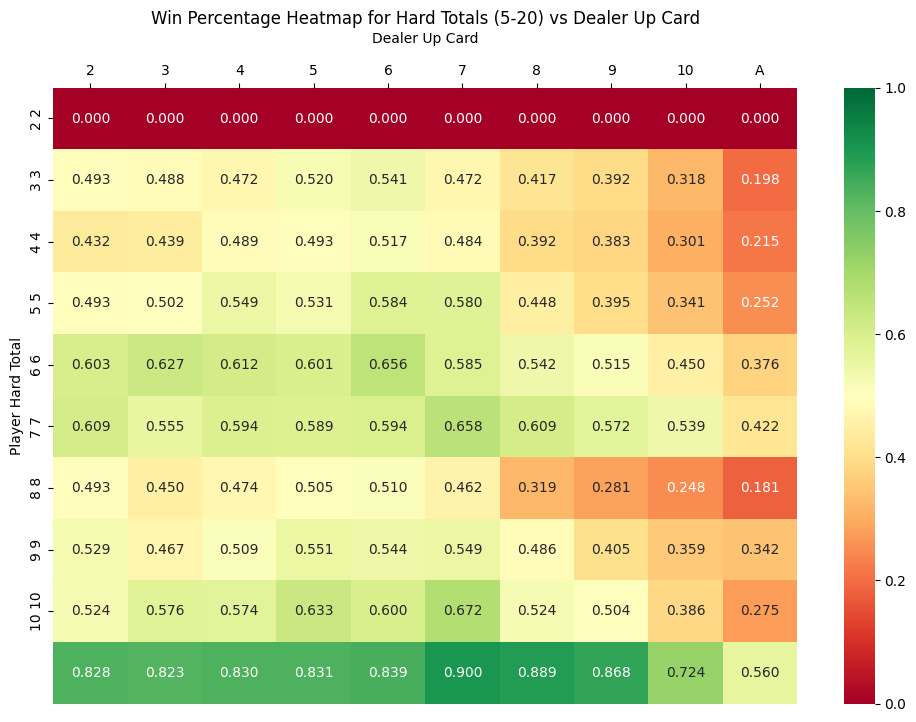

In [ ]:
win_percentage_matrix_hard = win_percentage_matrix[:, 25:35]

win_percentage_matrix_hard = win_percentage_matrix_hard.T

pair_totals = [f"{i} {i}" for i in range(2, 11)]
pair_totals = pair_totals.append("A A")
dealer_labels = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "A"]

plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    win_percentage_matrix_hard,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",  # Red for lower win rates, green for higher win rates
    xticklabels=dealer_labels,  # Dealer up cards at the top
    yticklabels=pair_totals,    # Hard totals on the left
    vmin=0,
    vmax=1
)
ax.xaxis.set_label_position('top')  # Moves the x-axis label to the top
ax.set_xlabel("Dealer Up Card", labelpad=15)  # Adjust labelpad as needed
ax.xaxis.tick_top()  # Moves the tick labels to the top

ax.set_title("Win Percentage Heatmap for Hard Totals (5-20) vs Dealer Up Card")
ax.set_xlabel("Dealer Up Card")
ax.set_ylabel("Player Hard Total")
plt.show()